# Project: NVIDIA Headline News Sentiment Analysis

This project performs sentiment analysis on the latest headlines related to NVIDIA using the FinBERT model. The goal is to assess the overall market sentiment surrounding NVIDIA by classifying headlines as positive, negative, or neutral. The model helps understand how news impacts stock sentiment and potential market reactions.

In [1]:
import numpy as np
import pandas as pd
import feedparser
import yfinance as yf
import ipywidgets as widgets
import matplotlib.pyplot as plt

from collections import Counter
from transformers import pipeline
from IPython.display import display
from collections import defaultdict
from datetime import datetime

# Getting data 

In [2]:
# Initialize the sentiment analysis model 
pipe = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english", framework="pt")

Device set to use cpu


In [3]:
# Fetch RSS feed
keyword = 'nvidia stock'
rss_url = f'https://news.google.com/rss/search?q={keyword.replace(" ", "+")}'
feed = feedparser.parse(rss_url)

In [4]:
sentiment = []

# Aggregate sentiment scores by date
sentiment_by_date = defaultdict(list)

for entry in feed.entries:
    date = datetime(*entry.published_parsed[:3]).strftime('%Y-%m-%d')
    summary = entry.summary

    result = pipe(summary)[0]
    label = result['label'].lower()
    score = result['score']
    sentiment.append(label)
    
    if label == 'positive':
        sentiment_by_date[date].append(score)
    elif label == 'negative':
        sentiment_by_date[date].append(-score)

In [5]:
print(Counter(sentiment))

Counter({'negative': 100})


In [6]:
# Calculate average daily sentiment score
dates = sorted(sentiment_by_date.keys())
avg_scores = [sum(sentiment_by_date[date]) / len(sentiment_by_date[date]) for date in dates]

# Plotting the sentiment trend

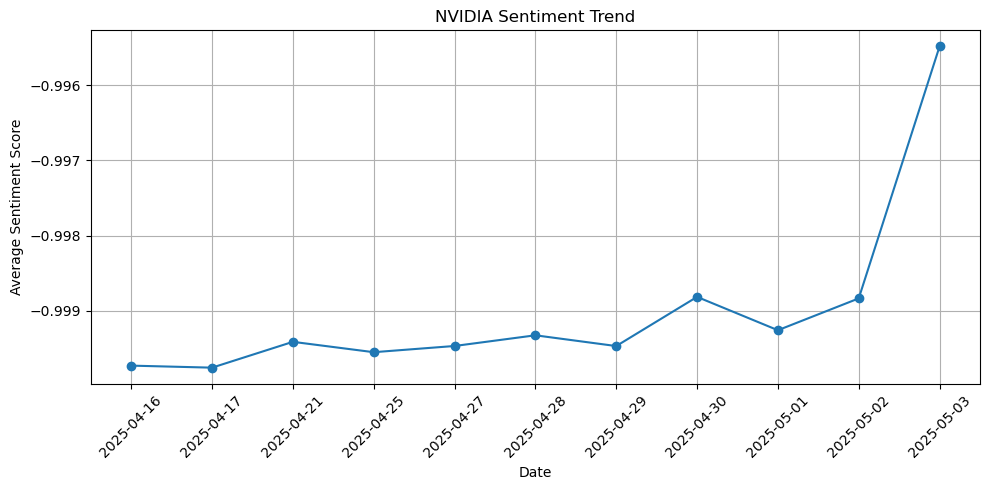

In [7]:
plt.figure(figsize=(10,5))
plt.plot(dates, avg_scores, marker='o')
plt.xticks(rotation=45)
plt.title('NVIDIA Sentiment Trend')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the stock price during the same period

In [8]:
# download NVIDIA stock price
ticker = 'NVDA'
start_date = '2024-04-16'
end_date = '2024-05-03'  

data = yf.download(ticker, start=start_date, end=end_date)
print(data[['Close']])

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           NVDA
Date                 
2024-04-16  87.386284
2024-04-17  84.007401
2024-04-18  84.643181
2024-04-19  76.174973
2024-04-22  79.491882
2024-04-23  82.395927
2024-04-24  79.650826
2024-04-25  82.604866
2024-04-26  87.706184
2024-04-29  87.728172
2024-04-30  86.373619
2024-05-01  83.013718
2024-05-02  85.788811


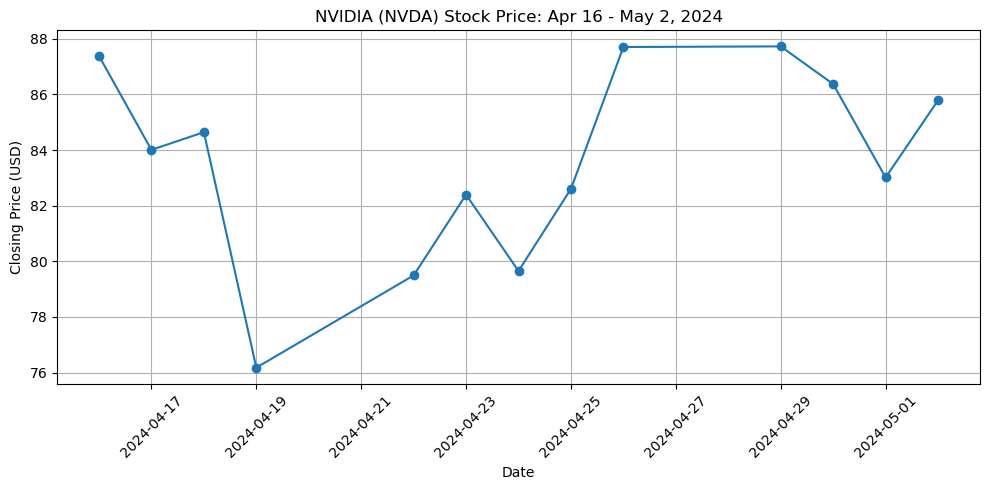

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], marker='o')
plt.title('NVIDIA (NVDA) Stock Price: Apr 16 - May 2, 2024')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()